### Start by definining network architecture

In [6]:
import os
base_dir = '/Users/Shrinikesh/Documents/keras/keras/datasets/cats_and_dogs/clean'
# Making folders to store the training, test and validation data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

### Initial convnet transforms input 150x150x3 to a 6272 dim feature vector that then goes through a dense network

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

### Model has been defined, but need to transform input and targets to suitable tensors first

In [9]:
# we will use the ImageDataGenerator which generates batches of tensors of JPEG images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Note that flow_from_directory excpects a directory that has the two classes of images in separate subdirectories
# so we will point it at train_dir
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Now to train the model

In [10]:
# using fit_generator here as we have batches generated by a generator  
# history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs=30, validation_data = validation_generator, validation_steps=50)

### Save the model 

In [11]:
# model.save('cats_and_dogs_small_1.h5')

### Plotting loss and accuracy during training now

NameError: name 'history' is not defined

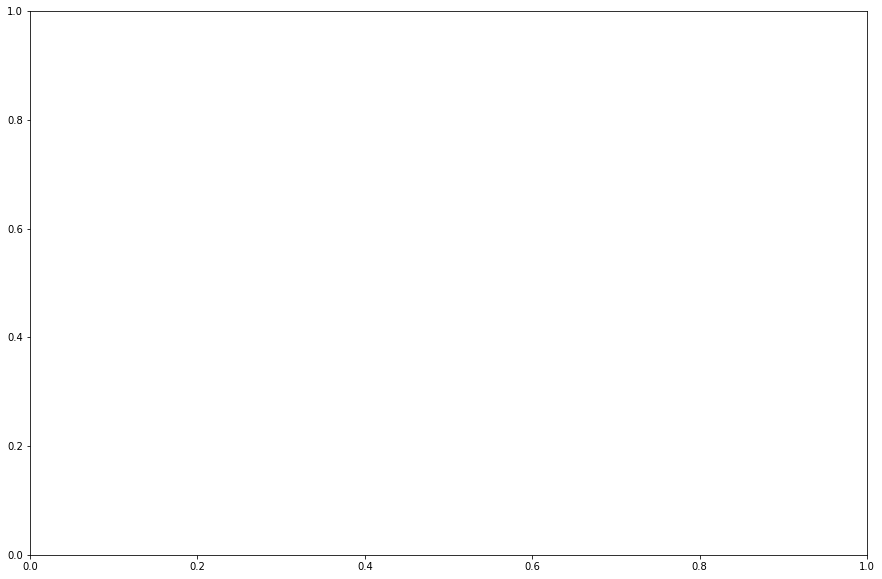

In [13]:
# import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,10))
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss= history.history['loss']
# val_loss= history.history['val_loss']

# epochs = range(1, len(acc)+1)

# plt.plot(epochs, acc, 'bo', label='Training Acc' ax=axs[0,0])
# plt.plot(epochs, val_acc, 'r+', label='Validation Acc', ax=axs[0,0])
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training Loss', ax= axs[0,1])
# plt.plot(epochs, val_loss, 'bo', label='Validation Loss'ax= axs[0,1])
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()
